# Importing libraries and dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [15]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegressionCV
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('/content/StudentsPerformance.csv')
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Cleaning data
Rename columns

In [3]:
# Rename columns
df.columns = df.columns.str.replace(" ", "_").copy()
df = df.rename({'parental_level_of_education':'parent_education', 
                        'race/ethnicity':'ethnicity', 
                        'test_preparation_course':'prep_course'}, 
                        axis=1).copy()
df.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch', 'prep_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

Unique values

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column} unique values: {unique_values}', '\n')

gender unique values: ['female' 'male'] 

ethnicity unique values: ['group B' 'group C' 'group A' 'group D' 'group E'] 

parent_education unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch unique values: ['standard' 'free/reduced'] 

prep_course unique values: ['none' 'completed'] 

math_score unique values: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading_score unique values: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48

# Vizualization

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been as

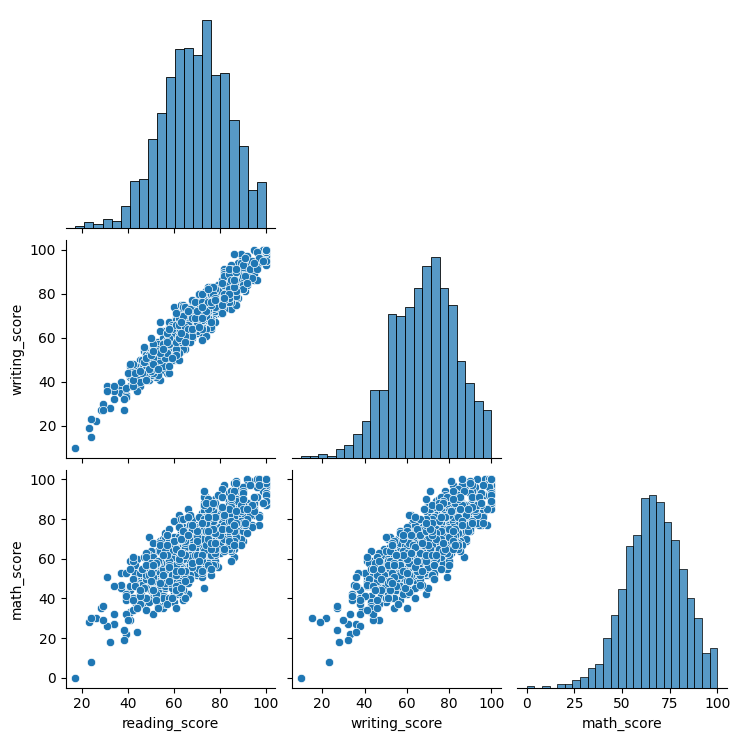

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["reading_score","writing_score","math_score"]

sns.pairplot(df[attributes], corner=True, palette='pastel')
plt.show()

<Axes: xlabel='math_score', ylabel='Count'>

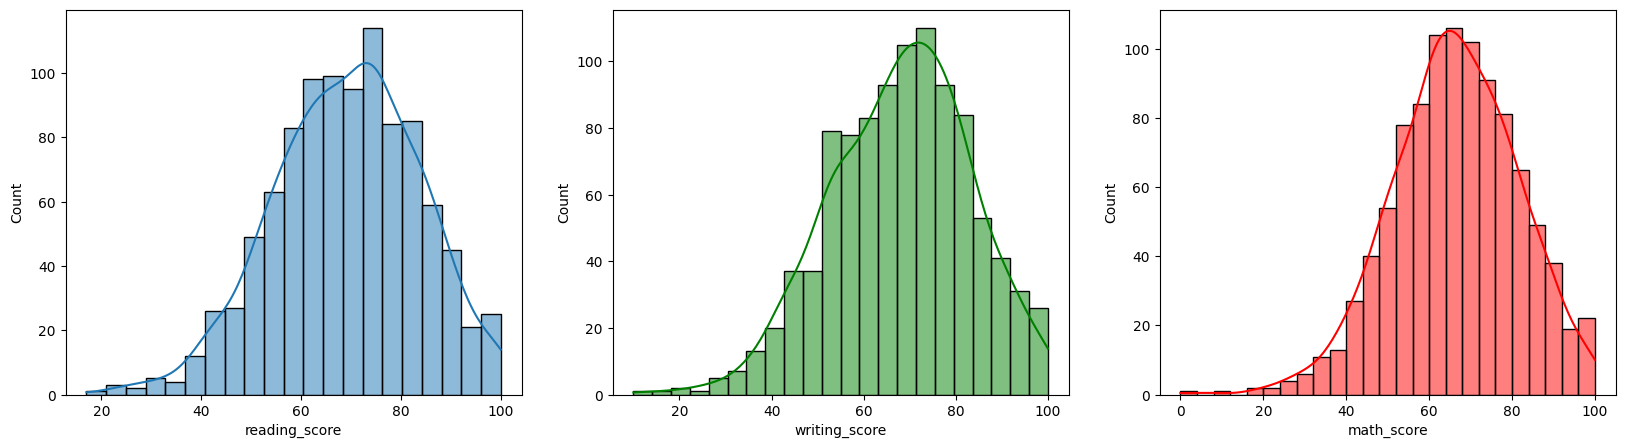

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.histplot(df["reading_score"], ax=axes[0], kde=True)
sns.histplot(df["writing_score"], legend=True, ax=axes[1], color='green', kde=True)
sns.histplot(df["math_score"], legend=True, ax=axes[2], color='red', kde=True)

In [7]:
# type changing 
df['gender'] = df['gender'].astype('category')
df['ethnicity'] = df['ethnicity'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['parent_education'] = df['parent_education'].astype('category')
df['prep_course'] = df['prep_course'].astype('category')
df.dtypes

gender              category
ethnicity           category
parent_education    category
lunch               category
prep_course         category
math_score             int64
reading_score          int64
writing_score          int64
dtype: object

In [8]:
df['mean'] = np.round(df[['math_score', 'reading_score', 'writing_score']].mean(axis=1), decimals=2)
df['approved'] = df['mean'].apply(lambda mean: int(mean > 65))

In [9]:
df

,gender,ethnicity,parent_education,lunch,prep_course,math_score,reading_score,writing_score,mean,approved
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,1
1,female,group C,some college,standard,completed,69,90,88,82.33,1
2,female,group B,master's degree,standard,none,90,95,93,92.67,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,0
4,male,group C,some college,standard,none,76,78,75,76.33,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,1
996,male,group C,high school,free/reduced,none,62,55,55,57.33,0
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,0
998,female,group D,some college,standard,completed,68,78,77,74.33,1


In [11]:
x=df[['math_score','reading_score','writing_score']].values
y=df['approved'].values

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [13]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [19]:
x1 = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor,LogisticRegression]]
x1

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 0.09441347778392788
MAE: 0.2661840646080357
R2 : 61.43 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 0.09949517313162505
MAE: 0.2806004277003974
R2 : 59.36 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 0.0944134342452513
MAE: 0.26618416154135904
R2 : 61.43 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 0.09573891575895647
MAE: 0.27225917368045777
R2 : 60.89 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 0.018008800000000002
MAE: 0.039200000000000006
R2 : 92.64 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 0.028
MAE: 0.028
R2 : 88.56 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MSE: 0.0134

[None, None, None, None, None, None, None, None, None]

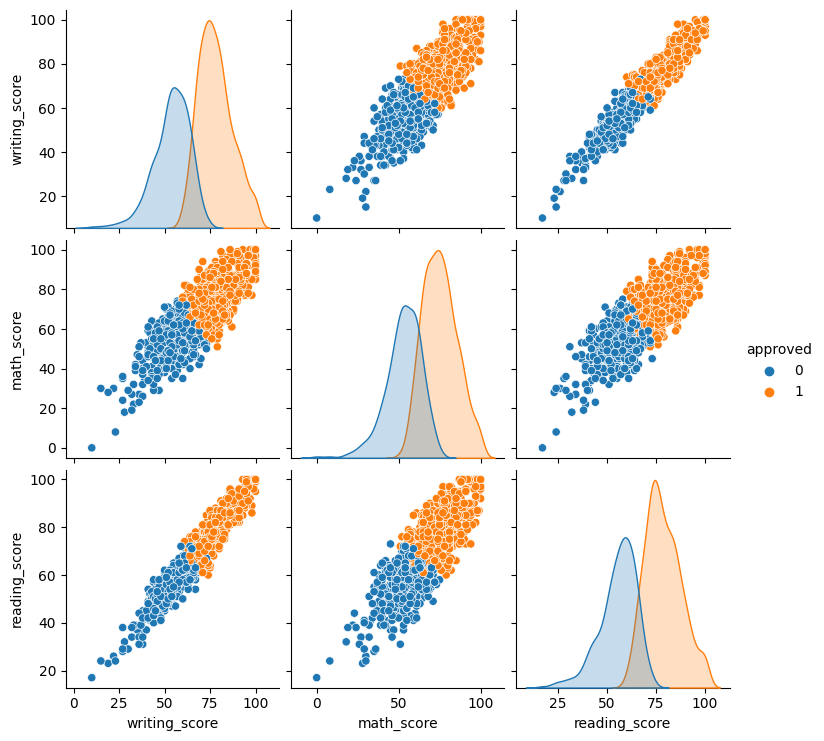

In [18]:
sns.pairplot(df[['writing_score', 'math_score', 'reading_score', 'approved']], hue='approved')
plt.show()